In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [3]:
raw_data = pd.read_csv(r'C:\Users\Georg\Desktop\TTRS\2-EMS\research\Forecasting\RawData\LoadData\old_buliding\load_data_old1-96.csv')
# time_series_data_old = np.array(raw_data['Power-96'])[4500:6000]  # Your time series data
time_series_data_old = np.array(raw_data['Power-96'])

In [4]:
raw_data = pd.read_csv(r'C:\Users\Georg\Desktop\TTRS\2-EMS\research\Forecasting\Data\Total_12-5.csv')
# time_series_data_new = np.array(raw_data['Power'])[500:3000]   # Your time series data
time_series_data_new = np.array(raw_data['Power'])

### FFT寻找周期性

Here's the Python code to detect periodicity in a time series using Fast Fourier Transform (FFT), along with a clear explanation:

**Code Explanation**

1. **Import Libraries:**
   - `numpy` for numerical operations.
   - `matplotlib.pyplot` for plotting.
   - `scipy.fft` for FFT calculations.

2. **`detect_periodicity_fft` Function:**
   - Takes `time_series` (the data) and `sampling_rate` as input.
   - **FFT Calculation:**  Calculates the FFT of the `time_series`.
   - **Frequency Calculation:** Determines the frequencies corresponding to the FFT values.
   - **Positive Frequencies:** Filters for positive frequencies and their magnitudes.
   - **Peak Detection:** Finds the frequency with the highest magnitude (peak).
   - **Period Calculation:** Calculates the period (1/frequency) corresponding to the peak frequency. If the peak frequency is 0, it indicates no clear periodicity.
   - **Plotting:**
     - Creates a figure with two subplots.
     - Top subplot: Plots the original `time_series`.
     - Bottom subplot: Plots the frequency spectrum (magnitude vs. frequency).

3. **Example Usage:**
   - Replace `time_series_data` and `sampling_rate` with your actual data.
   - Calls `detect_periodicity_fft` to find the dominant period.
   - Prints the dominant period if found, otherwise indicates no clear periodicity.

**Key Improvements with Altair**

* **Interactive Visualization:** The Altair library is used to create interactive plots, allowing you to zoom, pan, and hover over data points for detailed inspection.
* **Combined Chart:** The time series plot and the frequency spectrum are combined into a single chart for easier comparison.
* **Tooltip:** Tooltips are added to display the exact values of time, value, frequency, and magnitude when you hover over data points.
* **JSON Output:** The chart is saved as a JSON file (`time_series_and_spectrum_chart.json`), which can be easily embedded in web pages or shared.

**How to Use**

1. **Prepare Your Data:** Have your time series data ready as a 1D NumPy array.
2. **Set Sampling Rate:** Determine the sampling rate of your data (how many samples per unit of time).
3. **Run the Code:** Execute the code, and it will:
   - Calculate the FFT.
   - Identify the dominant period (if any).
   - Display an interactive plot of the time series and its frequency spectrum.
   - Save the chart as a JSON file.

Let me know if you'd like help adapting this code to your specific time series data!

In [4]:
def detect_periodicity_fft_with_plt(time_series, sampling_rate):
  """
  Detects periodicity in a time series using FFT and visualizes with Altair.

  Args:
    time_series: The input time series data as a 1D numpy array.
    sampling_rate: The sampling rate of the time series (samples per unit time).

  Returns:
    period: The dominant period of the time series, or None if no clear periodicity is found.
  """

  # Check if time series has enough data points
  if len(time_series) < 2:
    print("Error: Time series needs at least 2 data points for FFT analysis.")
    return None

  # Perform FFT
  fft_values = fft(time_series)
  frequencies = fftfreq(len(time_series), 1 / sampling_rate)

  # Keep only positive frequencies and their magnitudes
  positive_frequencies = frequencies[np.where(frequencies > 0)]
  positive_fft_values = np.abs(fft_values[:len(positive_frequencies)])

  # Find peak frequency (excluding DC component at frequency 0)
  peak_frequency_index = np.argmax(positive_fft_values[1:]) + 1  # +1 to account for excluding DC
  peak_frequency = positive_frequencies[peak_frequency_index]

  # Calculate and return period
  if peak_frequency != 0:
    period = 1 / peak_frequency
    print(f"Dominant period found: {period:.2f} (at frequency {peak_frequency:.2f} Hz)")
  else:
    period = None
    print("No dominant period found (signal is likely not periodic).")

 # Plotting with Matplotlib
  plt.figure(figsize=(12, 6))

  # Time series plot
  plt.subplot(2, 1, 1)
  plt.plot(time_series)
  plt.title("Time Series")
  plt.xlabel("Time")
  plt.ylabel("Value")

  # Frequency spectrum plot
  plt.subplot(2, 1, 2)
  plt.plot(positive_frequencies, positive_fft_values)
  plt.title("Frequency Spectrum (FFT)")
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Magnitude")

  plt.tight_layout()
  plt.show()


  return period




In [5]:
def detect_periodicity_fft_with_altair(time_series, sampling_rate):
  """
  Detects periodicity in a time series using FFT and visualizes with Altair.

  Args:
    time_series: The input time series data as a 1D numpy array.
    sampling_rate: The sampling rate of the time series (samples per unit time).

  Returns:
    period: The dominant period of the time series, or None if no clear periodicity is found.
  """

  # Check if time series has enough data points
  if len(time_series) < 2:
    print("Error: Time series needs at least 2 data points for FFT analysis.")
    return None

  # Perform FFT
  fft_values = fft(time_series)
  frequencies = fftfreq(len(time_series), 1 / sampling_rate)

  # Keep only positive frequencies and their magnitudes
  positive_frequencies = frequencies[np.where(frequencies > 0)]
  positive_fft_values = np.abs(fft_values[:len(positive_frequencies)])

  # Find peak frequency (excluding DC component at frequency 0)
  peak_frequency_index = np.argmax(positive_fft_values[1:]) + 1  # +1 to account for excluding DC
  peak_frequency = positive_frequencies[peak_frequency_index]

  # Calculate and return period
  if peak_frequency != 0:
    period = 1 / peak_frequency
    print(f"Dominant period found: {period:.2f} (at frequency {peak_frequency:.2f} Hz)")
  else:
    period = None
    print("No dominant period found (signal is likely not periodic).")

  # Data preparation for Altair
  time_values = np.arange(len(time_series))
  df_time_series = pd.DataFrame({'Time': time_values, 'Value': time_series})
  df_spectrum = pd.DataFrame({'Frequency': positive_frequencies, 'Magnitude': positive_fft_values})

  # Altair charts
  time_series_chart = alt.Chart(df_time_series).mark_line().encode(
      x='Time',
      y='Value',
      tooltip=['Time', 'Value']
  ).properties(
      title='Time Series'
  ).interactive()

  spectrum_chart = alt.Chart(df_spectrum).mark_line().encode(
      x='Frequency',
      y='Magnitude',
      tooltip=['Frequency', 'Magnitude']
  ).properties(
      title='Frequency Spectrum (FFT)'
  ).interactive()

  # Combined chart
  combined_chart = time_series_chart | spectrum_chart

  # Display chart (optional, depends on your environment)
  combined_chart.show()

  return period


Dominant period found: 17.05 (at frequency 0.06 Hz)


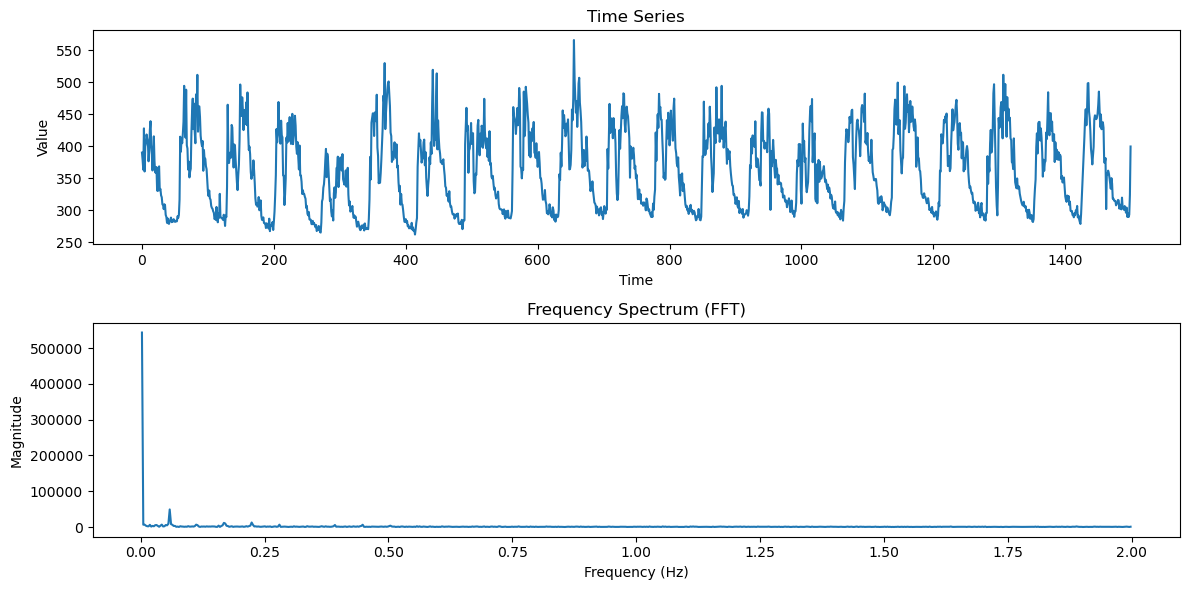

In [6]:
sampling_rate = 4 # Hz (samples per second)
dominant_period = detect_periodicity_fft_with_plt(time_series_data_old, sampling_rate)

In [7]:
sampling_rate = 4 # Hz (samples per second)
dominant_period = detect_periodicity_fft_with_altair(time_series_data_old, sampling_rate)

Dominant period found: 17.05 (at frequency 0.06 Hz)


alt.HConcatChart(...)

Dominant period found: 312.50 (at frequency 0.00 Hz)


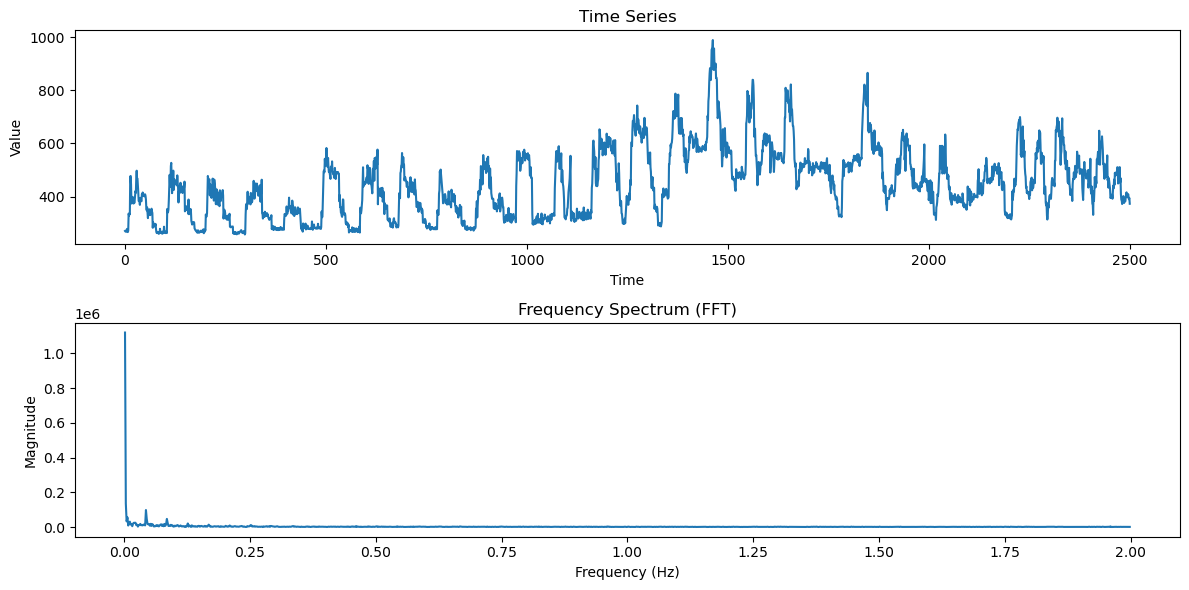

In [8]:
sampling_rate = 4 # Hz (samples per second)
dominant_period = detect_periodicity_fft_with_plt(time_series_data_new, sampling_rate)

In [9]:
sampling_rate = 4 # Hz (samples per second)
dominant_period = detect_periodicity_fft_with_altair(time_series_data_new, sampling_rate)

Dominant period found: 312.50 (at frequency 0.00 Hz)


alt.HConcatChart(...)

### 计算周期性的一些量化指标

**代码说明:**

1. **计算峰值因子:**  找到序列的最大绝对值和平均绝对值，两者相除。
2. **计算信噪比:**  
   - 使用 `scipy.signal.periodogram` 计算功率谱。
   - 找到功率谱中的最大峰值，作为周期性成分的频率。
   - 计算周期性成分的功率和噪声的功率。
   - 信噪比用 dB 表示，即 10 * log10(信号功率 / 噪声功率)。
3. **计算周期性指数:**
   - 计算序列的总方差。
   - 假设周期性成分为正弦波，其方差为功率谱峰值的一半。
   - 周期性指数为周期性方差与总方差之比。


**注意事项:**

- 此代码假设周期性成分为正弦波。对于更复杂的周期性模式，需要更复杂的分析方法。
- 信噪比的计算依赖于准确识别周期性峰值。在噪声较大的情况下，可能需要更鲁棒的峰值检测方法。
- 周期性指数的计算是一种简化，实际情况可能更复杂。

请根据你的具体数据和需求，对代码进行调整和优化。

In [13]:
import numpy as np
import scipy.signal as signal

def calculate_metrics(time_series_data):
    """
    计算时间序列数据的峰值因子、信噪比和周期性指数。

    Args:
        time_series_data: 时间序列数据，一维 NumPy 数组。

    Returns:
        peak_factor: 峰值因子。
        snr: 信噪比（dB）。
        seasonality_index: 周期性指数。
    """

    # 计算峰值因子
    peak_value = np.max(np.abs(time_series_data))
    mean_value = np.mean(np.abs(time_series_data))
    peak_factor = peak_value / mean_value
    print(peak_value,mean_value)

    # 计算信噪比
    frequencies, power_spectrum = signal.periodogram(time_series_data,fs=400)
    # 寻找周期性峰值
    peak_frequency_index = np.argmax(power_spectrum)
    peak_frequency = frequencies[peak_frequency_index]
    # 计算周期性成分功率和噪声功率
    signal_power = power_spectrum[peak_frequency_index]
    # noise_power = np.abs(np.sum(power_spectrum) - signal_power)
    noise_power = np.sum(power_spectrum) - signal_power
    print(signal_power, noise_power)
    snr = 10 * np.log10(signal_power / noise_power)

    # 计算周期性指数
    total_variance = np.var(time_series_data)
    # 假设周期性成分为正弦波，计算其方差
    seasonal_variance = signal_power / 2  
    seasonality_index = seasonal_variance / total_variance

    return peak_factor, snr, seasonality_index




In [14]:
# 示例用法
data = time_series_data_new  # 你的时间序列数据
peak_factor, snr, seasonality_index = calculate_metrics(data)

print("峰值因子:", peak_factor)
print("信噪比 (dB):", snr)
print("周期性指数:", seasonality_index)

1035.2999999999995 406.7821606786427
89521.84854121784 376896.8684085437
峰值因子: 2.5450968603755584
信噪比 (dB): -6.24293487581368
周期性指数: 3.846367608269118


In [15]:
# 示例用法
data = time_series_data_old  # 你的时间序列数据
peak_factor, snr, seasonality_index = calculate_metrics(data)

print("峰值因子:", peak_factor)
print("信噪比 (dB):", snr)
print("周期性指数:", seasonality_index)

565.6025 252.02878305225903
215829.19205842412 208333.4268083842
峰值因子: 2.2441980362327123
信噪比 (dB): 0.15351227499266373
周期性指数: 9.164771628975071


(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, -50000.0, '−50000'),
  Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000'),
  Text(0, 250000.0, '250000')])

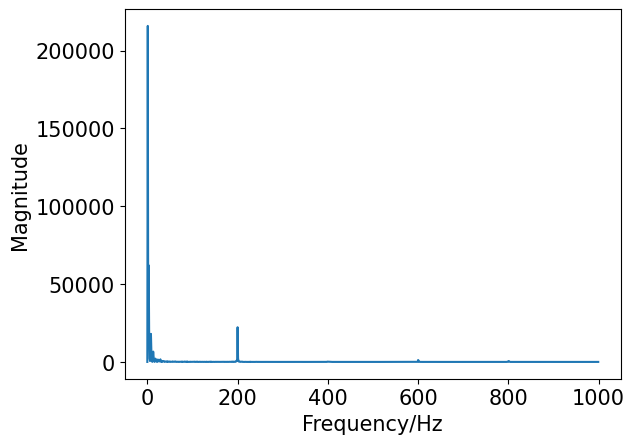

In [11]:
frequencies, power_spectrum = signal.periodogram(time_series_data_old,fs=400)
plt.plot(power_spectrum[:1000])
plt.xlabel('Frequency/Hz',fontdict={'fontsize':18})
plt.ylabel('Magnitude',fontdict={'fontsize':18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 [Text(0, -20000.0, '−20000'),
  Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000')])

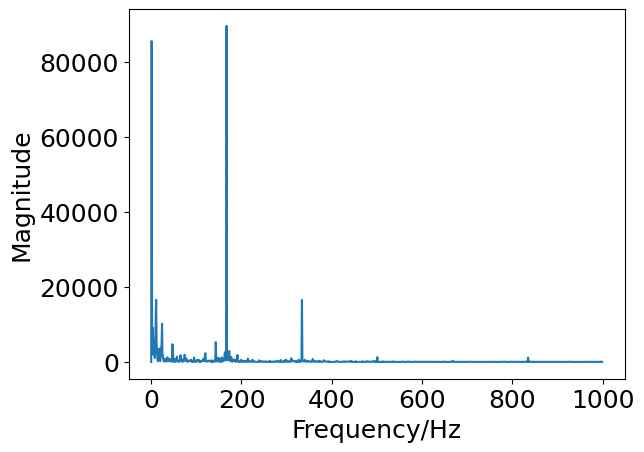

In [12]:
frequencies, power_spectrum = signal.periodogram(time_series_data_new,fs=400)
plt.plot(power_spectrum[:1000])
plt.xlabel('Frequency/Hz',fontdict={'fontsize':18})
plt.ylabel('Magnitude',fontdict={'fontsize':18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)